In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sb 
import warnings 
warnings.filterwarnings(action='ignore')

pull the Data from CSV file and convert to Data frame


In [36]:
df = pd.read_csv(r'/Users/manikantamukkapati/Downloads/Personal Coding Programs/python projects/python_machine_learning_projects/MachineLearningProject_one/stud.csv')


In [37]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [38]:
df.shape

(1003, 8)

In [39]:
df[1000:]

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
1000,female,group D,some college,free/reduced,none,77,86,86
1001,female,group D,some college,standard,completed,68,78,NAN
1002,female,group D,some college,standard,completed,68,78,NaN


Check NUll values and drop those rows from data frame

In [43]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  1
dtype: int64

In [50]:
df[df.isna().any(axis=1)]

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
1002,female,group D,some college,standard,completed,68,78,NaN


In [51]:
df.drop(index=1002,axis=1,inplace=True)

In [52]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [53]:
df.shape

(1002, 8)

Check the duplicated values and remove from the data frame

In [54]:
df.duplicated().sum()

np.int64(1)

In [56]:
df[df.duplicated()]

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
999,female,group D,some college,standard,completed,68,78,77


In [57]:
df.drop(index=999,axis=1,inplace=True)

In [58]:
df.duplicated().sum()

np.int64(0)

In [59]:
df.shape

(1001, 8)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1001 entries, 0 to 1001
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1001 non-null   object
 1   race_ethnicity               1001 non-null   object
 2   parental_level_of_education  1001 non-null   object
 3   lunch                        1001 non-null   object
 4   test_preparation_course      1001 non-null   object
 5   math_score                   1001 non-null   int64 
 6   reading_score                1001 non-null   int64 
 7   writing_score                1001 non-null   object
dtypes: int64(2), object(6)
memory usage: 70.4+ KB


In [63]:
df['writing_score'] = df['writing_score'].astype(int)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1001 entries, 0 to 1001
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1001 non-null   object
 1   race_ethnicity               1001 non-null   object
 2   parental_level_of_education  1001 non-null   object
 3   lunch                        1001 non-null   object
 4   test_preparation_course      1001 non-null   object
 5   math_score                   1001 non-null   int64 
 6   reading_score                1001 non-null   int64 
 7   writing_score                1001 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 70.4+ KB


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1001 entries, 0 to 1001
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1001 non-null   object
 1   race_ethnicity               1001 non-null   object
 2   parental_level_of_education  1001 non-null   object
 3   lunch                        1001 non-null   object
 4   test_preparation_course      1001 non-null   object
 5   math_score                   1001 non-null   int64 
 6   reading_score                1001 non-null   int64 
 7   writing_score                1001 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 70.4+ KB


Seggregate the Categorical and Numerical features from the data frame

In [68]:
numerical_columns = [feature for feature in df.columns if df[feature].dtype!='O']
categorical_columns = [feature for feature in df.columns if df[feature].dtype=='O']
print(numerical_columns)
print(categorical_columns)

['math_score', 'reading_score', 'writing_score']
['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


from the privided CSV file below are the numerical and categorical feartures:

Numerical Features : ['math_score', 'reading_score', 'writing_score']


Categorical Features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']

Calculate the Average score and Total score for each Student based on the performance

features : math_score
           reading_score
           writing_score

In [70]:
df['total_score'] = df['math_score']+df['reading_score']+df['writing_score']
df['average_score'] = df['total_score']/3


In [71]:
df.head(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,0,144,48.000000
1,female,group C,some college,standard,completed,69,90,0,159,53.000000
2,female,group B,master's degree,standard,none,90,95,0,185,61.666667


In [72]:
categorical_columns

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [74]:
gender_categories =df['gender'].unique()
print('categories in gender : ',gender_categories)

race_ethnicities= df['race_ethnicity'].unique()
print('unique values in race ethnicities : ',race_ethnicities)

parental_level_of_education_categories= df['parental_level_of_education'].unique()
print('categories in parental_level_of_education : ',parental_level_of_education_categories)

categories_lunch = df['lunch'].unique()
print('categories in lunch :',categories_lunch)

categories_test_preparation_course= df['test_preparation_course'].unique()
print('categories in test preparation : ',categories_test_preparation_course)

categories in gender :  ['female' 'male']
unique values in race ethnicities :  ['group B' 'group C' 'group A' 'group D' 'group E']
categories in parental_level_of_education :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in lunch : ['standard' 'free/reduced']
categories in test preparation :  ['none' 'completed']


Plot a histogram based on the average score and check who is performing well

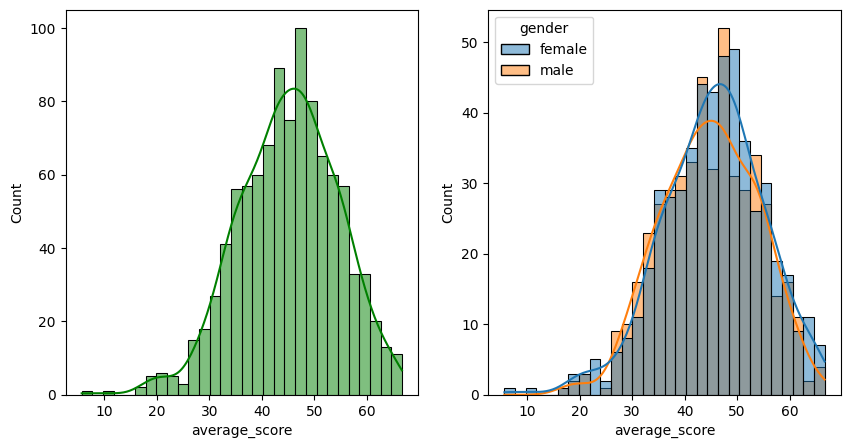

In [88]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

plt.subplot(121)
sb.histplot(data=df, x='average_score', kde=True, bins=30, color='g')
plt.subplot(122)
sb.histplot(data=df,x='average_score',kde=True,bins=30,color='y',hue='gender')

fig.show()


Visualize the histogram bsed on the total score


check based on the gender 

In [89]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average_score'],
      dtype='object')

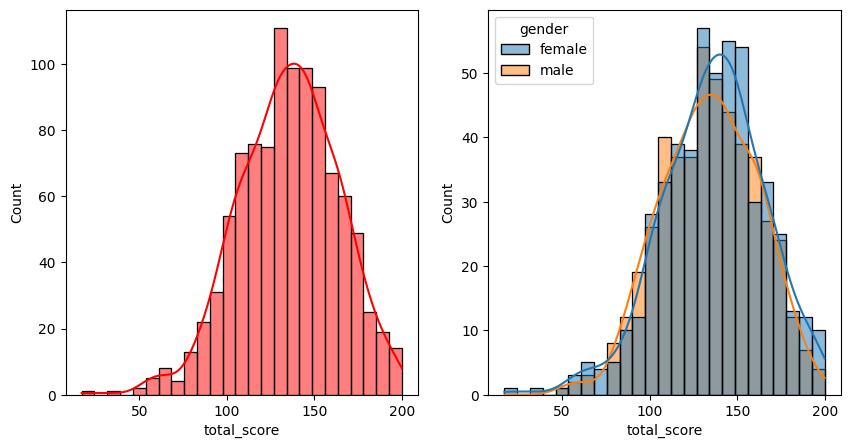

In [90]:
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
plt.subplot(121)
sb.histplot(data=df,x='total_score',kde=True,color='r')
plt.subplot(122)
sb.histplot(data=df,x='total_score',kde=True,color='w',hue='gender')
plt.show()


visualize the histogra for the lunch feature


check which lunch categoryb is performing well for male and female

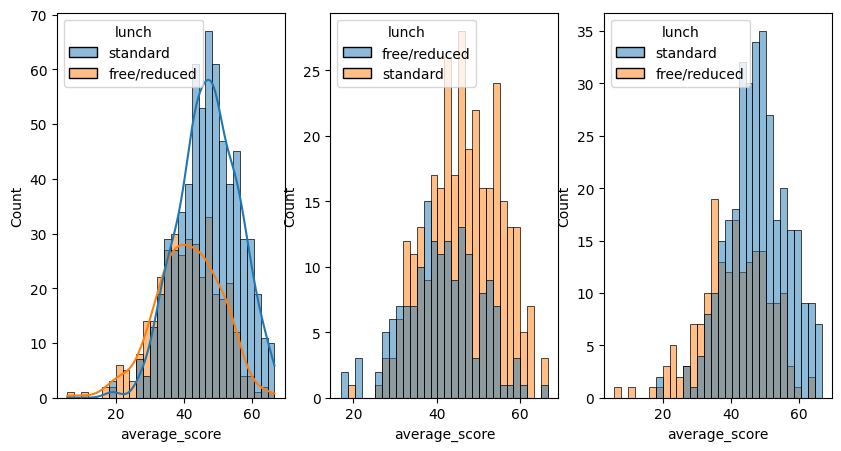

In [93]:
fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(10,5))
plt.subplot(131)
sb.histplot(data=df,x='average_score',bins=30,kde=True,color='b',hue='lunch')

plt.subplot(132)
sb.histplot(data=df[df['gender']=='male'],x='average_score',color='r',bins=30,hue='lunch')


plt.subplot(133)
sb.histplot(data=df[df['gender']=='female'],x='average_score',bins=30,color='g',hue='lunch')

plt.show()